<a href="https://colab.research.google.com/github/candrajulius/Classifcation_Nut_With_InceptionV3_And_Xception/blob/main/Classification_Nut_Use_Inception_V3_And_Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mengecek GPU

In [2]:
# Mengecek GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Menginstall beberapa modul
 Disini penulis menginstall beberapa modul atau library untuk digunakan dalam memproses dataset

In [3]:
# Import beberapa modul untuk digunakan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil
from PIL import Image
import matplotlib.image as mpimg
from zipfile import ZipFile
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.callbacks import ModelCheckpoint

import pandas as pd

# Menginstall Kaggle kedalam Collab

In [4]:
# Install Data From Kaggle
!pip install -q kaggle

# Memanggil Libaray File
Disini penulis membuat sebuah variabel files yang digunakan untuk menampung import library  dari google.colab. Setelah itu penulis memanggil fungsi upload.

**upload** digunakan untuk user bisa mengupload sebuah file kedalam collab

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"candrajuliussinaga","key":"f1b5e10673fde9255b882ba2af119a93"}'}

# Memmbuat directory & Memberikan izin kaggle
Perintah tersebut digunakan untuk membuat direktori ~/.kaggle dan meng-copy file kaggle.json ke dalam direktori tersebut. Selanjutnya, perintah chmod 600 digunakan untuk memberikan izin akses baca-tulis hanya pada pengguna (user) untuk file kaggle.json, sementara izin akses baca-tulis untuk grup (group) dan pengguna lain (other) tidak diberikan.

Perintah terakhir ls ~/.kaggle digunakan untuk memeriksa apakah file kaggle.json berhasil di-copy ke direktori ~/.kaggle. Jika berhasil, maka file kaggle.json akan terlihat dalam daftar file yang ditampilkan oleh perintah ls.

In [6]:
# Make directory & Change Permission Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


# Download Dataset From Kaggle


In [7]:
# Download Dataset From kaggle
!kaggle datasets download -d ruopengan/11-common-nut-types-for-image-classification

100% 4.35G/4.36G [03:40<00:00, 32.2MB/s]
100% 4.36G/4.36G [03:40<00:00, 21.2MB/s]


# Extrat ZIP From Kaggle
Perintah tersebut digunakan untuk mengekstrak file zip dengan nama 11-common-nut-types-for-image-classification.zip yang telah diunduh sebelumnya dan disimpan di direktori kerja saat ini.

Pertama, kita menentukan nama file zip tersebut dengan menyimpannya dalam variabel file_name. Kemudian, kita menggunakan fungsi ZipFile dari modul zipfile untuk membuka file zip tersebut dalam mode baca ('r').

Selanjutnya, kita menggunakan metode extractall() untuk mengekstrak semua file dan direktori dalam file zip ke dalam direktori kerja saat ini. Setelah itu, kita mencetak pesan "Selesai mengekstrak zip" untuk memberi tahu pengguna bahwa proses ekstraksi telah selesai.

In [8]:
# Extrak ZIP From Kaggle
file_name = '/content/11-common-nut-types-for-image-classification.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Selesai mengekstrak zip')

Selesai mengekstrak zip


# Mendifinisikan direktori utama dataset yang digunakan


In [9]:
# Mendefinisikan direktori utama dataset yang digunakan
base_dir = '/content/Nuts/Nuts/train'

# Menghitung jumlah gambar dataset
Perintah tersebut digunakan untuk menghitung jumlah file yang ada pada setiap label di dalam direktori base_dir. Direktori base_dir adalah direktori yang berisi dataset gambar yang telah diekstrak sebelumnya.

Pertama, kita membuat sebuah dictionary kosong number_label yang akan digunakan untuk menyimpan jumlah file pada setiap label. Selanjutnya, kita menggunakan loop for untuk mengiterasi setiap label di dalam direktori base_dir. Pada setiap iterasi, kita menggunakan fungsi os.path.join() untuk menggabungkan base_dir dengan nama label dan mendapatkan path lengkap dari direktori label tersebut.

Kemudian, kita menggunakan fungsi os.listdir() untuk mendapatkan list dari semua file di dalam direktori label tersebut. Dengan menggunakan fungsi len(), kita menghitung jumlah file pada direktori label tersebut. Jumlah file tersebut kemudian disimpan di dalam dictionary number_label dengan key berupa nama label.

Selain itu, kita juga menghitung total jumlah file di seluruh dataset dengan menambahkan jumlah file pada setiap label pada setiap iterasi loop. Setiap kali jumlah file dihitung, kita mencetak pesan "Total Files: " yang diikuti dengan jumlah file sementara yang telah dihitung.

Setelah selesai menghitung jumlah file pada setiap label, kita mencetak pesan "Jumlah semua file yang ada pada dataset : " yang diikuti dengan jumlah total file di seluruh dataset.

In [10]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
  counting = len(os.listdir(os.path.join(base_dir,i)))
  number_label[i] = counting
  total_files += counting
  print('Total Files: ',str(total_files))
print('Jumlah semua file yang ada pada dataset : ',str(total_files))

Total Files:  120
Total Files:  240
Total Files:  360
Total Files:  480
Total Files:  600
Total Files:  720
Total Files:  840
Total Files:  960
Total Files:  1080
Total Files:  1200
Total Files:  1320
Jumlah semua file yang ada pada dataset :  1320


# Memvisualisasi Gambar dan Label
Perintah tersebut digunakan untuk membuat grafik bar yang menunjukkan jumlah gambar untuk setiap label di dalam dataset.

Pertama, kita menggunakan fungsi plt.bar() dari modul matplotlib.pyplot untuk membuat grafik bar. Argumen pertama yang diberikan adalah kunci (key) dari dictionary number_label, yang merepresentasikan nama label pada dataset. Argumen kedua adalah nilai (value) dari dictionary number_label, yang merepresentasikan jumlah gambar pada setiap label. Grafik bar akan menampilkan ketinggian (tinggi bar) yang sesuai dengan nilai jumlah gambar untuk setiap label.

Selanjutnya, kita menggunakan fungsi plt.title() untuk menambahkan judul pada grafik, yaitu "Jumlah Gambar Tiap Label". Fungsi plt.xlabel() dan plt.ylabel() digunakan untuk menambahkan label sumbu x dan y pada grafik, masing-masing dengan teks "Label" dan "Jumlah Gambar".

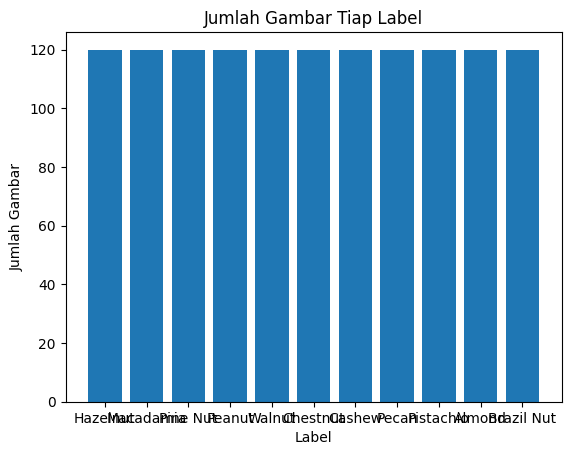

In [11]:
plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

# Menampilkan sampel gambar tiap kelas
Perintah tersebut digunakan untuk menampilkan sampel gambar dari masing-masing label di dalam dataset. Setiap label akan ditampilkan satu gambar saja. Variabel img_each_class menentukan jumlah gambar yang ingin ditampilkan untuk setiap label (dalam kasus ini, hanya satu gambar).

Pertama, kita membuat sebuah dictionary kosong img_samples yang akan digunakan untuk menyimpan path dari gambar yang akan ditampilkan. Kemudian, kita menggunakan loop for untuk mengiterasi setiap label di dalam dataset.

Pada setiap iterasi, kita menggunakan fungsi os.listdir() untuk mendapatkan list dari semua file di dalam direktori label tersebut. Kita hanya mengambil gambar pertama dari setiap label (dalam hal ini, gambar dengan indeks 0 dari list yang dihasilkan oleh os.listdir()).

Selanjutnya, kita menggunakan fungsi os.path.join() untuk menggabungkan base_dir dengan nama label dan nama file gambar yang dipilih. Path lengkap dari gambar tersebut kemudian disimpan di dalam dictionary img_samples dengan key berupa nama label.

Setelah kita mendapatkan path dari gambar untuk setiap label, kita menggunakan loop for untuk menampilkan gambar tersebut menggunakan plt.imshow(). Kita menggunakan modul matplotlib.image untuk membaca gambar dengan fungsi mpimg.imread() dan kemudian menampilkan gambar menggunakan plt.imshow(). Judul dari setiap gambar yang ditampilkan adalah nama label yang bersesuaian dengan gambar tersebut.

Dengan menampilkan sampel gambar dari masing-masing label, kita dapat memastikan bahwa dataset telah diekstrak dengan benar dan gambar-gambar tersebut dapat digunakan untuk tugas klasifikasi gambar.

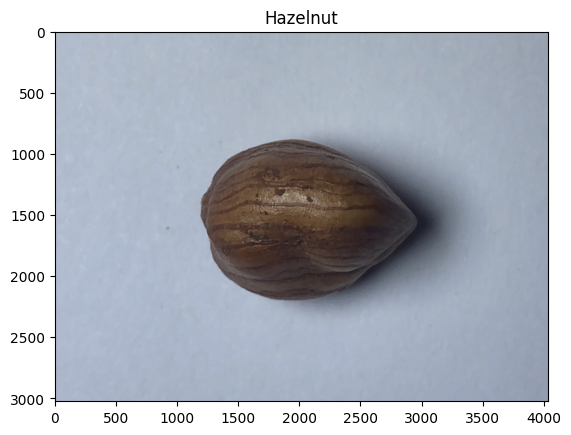

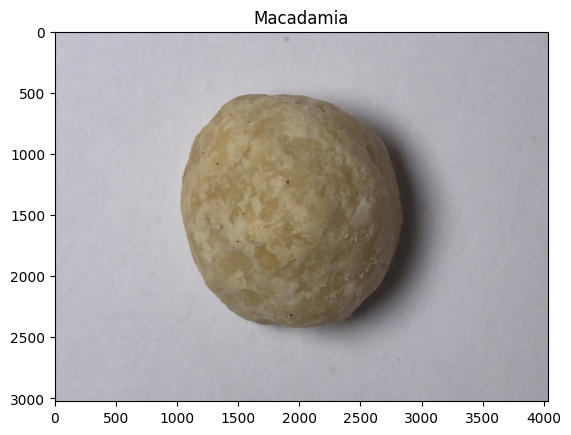

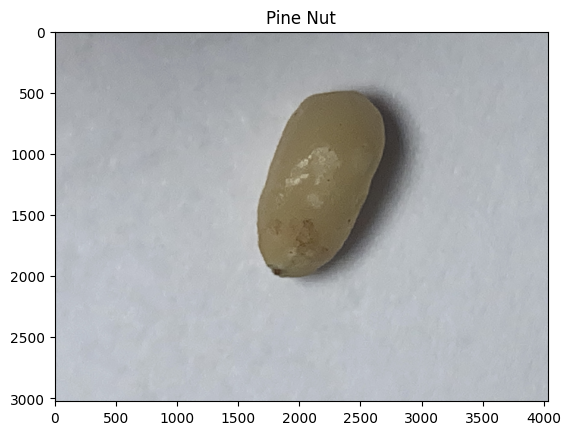

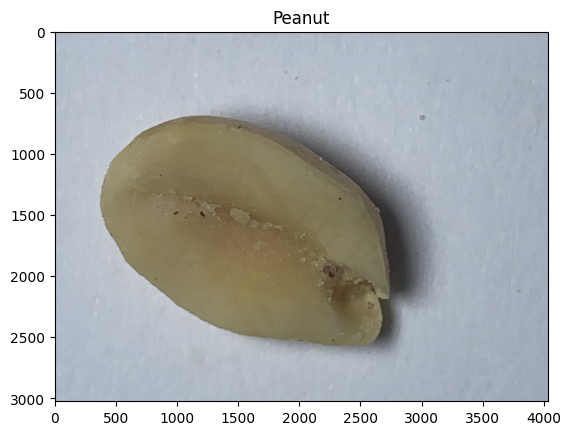

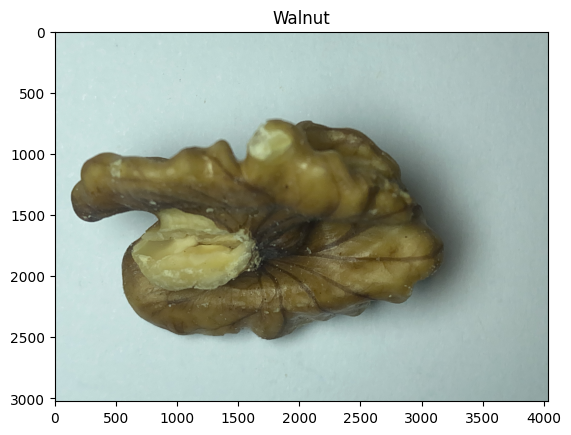

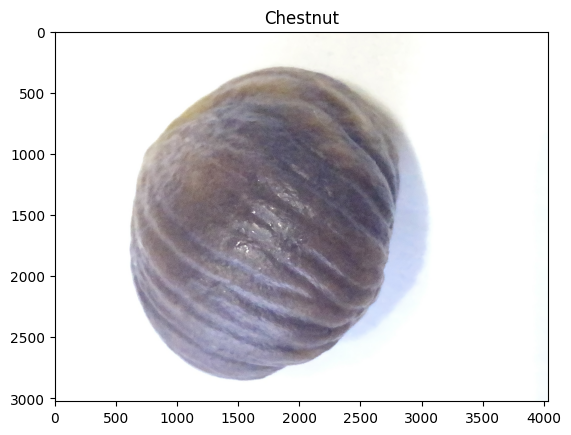

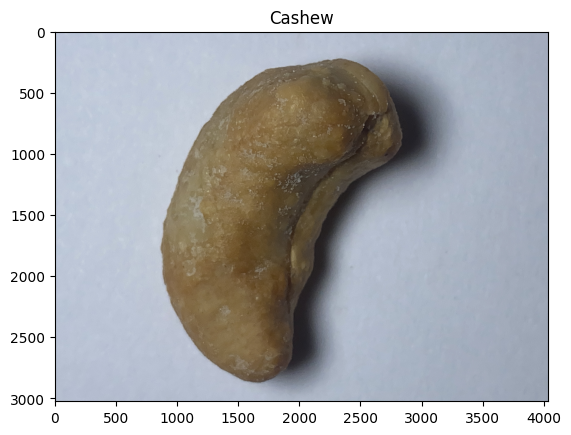

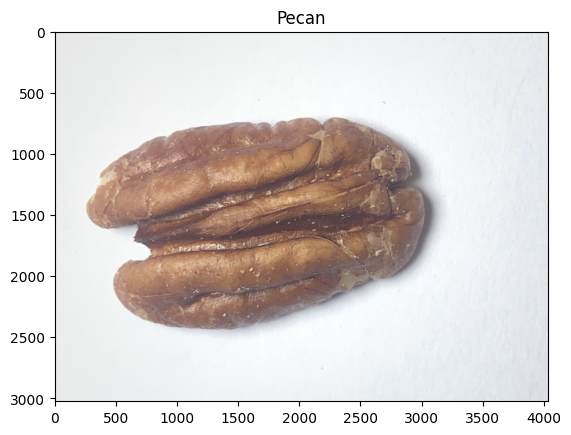

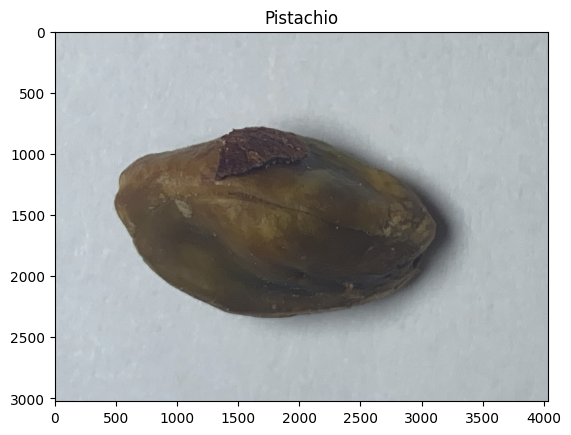

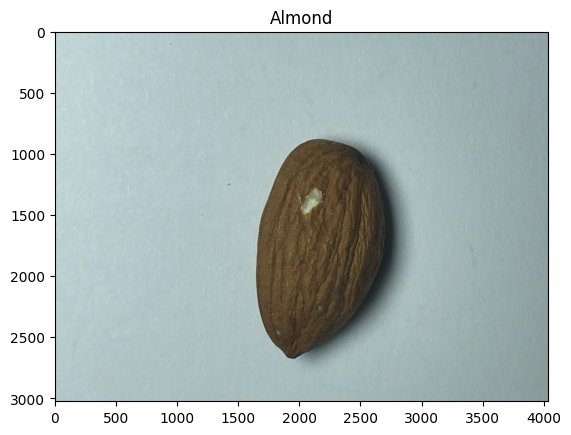

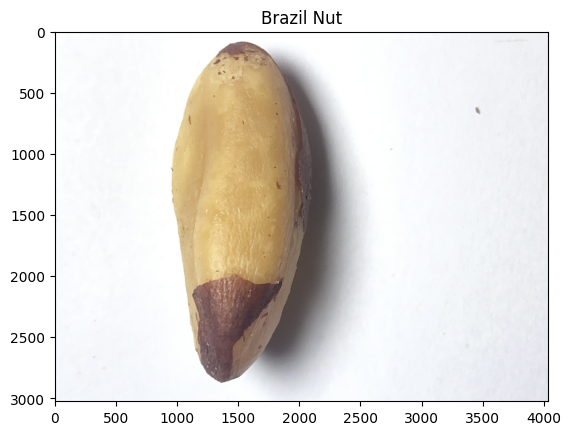

In [12]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

# Membuat directory train dan val setelah itu menggabungkan setiap direktori kedalam train dan val
Pada kode di bawah, kita mendefinisikan beberapa variabel yang berisi path dari direktori train dan validation untuk setiap label dalam dataset. Direktori train akan digunakan untuk melatih model, sedangkan direktori validation akan digunakan untuk menguji model.

Variabel base_dir_content berisi path dari direktori utama yang berisi folder train dan folder validation. Kemudian, kita menggunakan fungsi os.path.join() untuk menggabungkan path dari base_dir_content dengan nama folder train dan validation yang sudah ditentukan sebelumnya.

Selanjutnya, kita membuat variabel untuk setiap label di dalam dataset dan menggabungkan path dari folder train dan folder validation dengan nama folder label yang bersesuaian. Misalnya, variabel almond_dir berisi path dari direktori yang berisi gambar almond di dalam folder train.

Dengan melakukan hal ini, kita dapat dengan mudah mengakses gambar-gambar dari masing-masing label dan membaginya menjadi data latih dan data uji untuk melatih dan menguji model.

In [13]:
# Membuat directory train dan val stelah itu menggabungkan setiap direktori kedalam train dan val
# lalu membuat sub direktori
train = 'train'
val = 'val'
base_dir_content = '/content/Nuts'
train_dir = os.path.join(base_dir_content,train)
validation_dir = os.path.join(base_dir_content,val)

almond_dir = os.path.join(base_dir,'Almond')
brazi_nut_dir = os.path.join(base_dir,'Brazil Nut')
cashew_dir = os.path.join(base_dir,'Cashew')
chestnut_dir = os.path.join(base_dir,'Chestnut')
hazelnut_dir = os.path.join(base_dir,'Hazelnut')
macademia_dir = os.path.join(base_dir,'Macadamia')
peanut_dir = os.path.join(base_dir,'Peanut')
pecan_dir = os.path.join(base_dir,'Pecan')
pine_nut_dir = os.path.join(base_dir,'Pine Nut')
pistachio_dir = os.path.join(base_dir,'Pistachio')
walnut_dir = os.path.join(base_dir,'Walnut')



# Mentraining data yang ada di subdirektori
Pada kode di atas, kita menggunakan fungsi os.listdir() untuk menghitung jumlah gambar yang ada di setiap direktori label yang sudah ditentukan sebelumnya.

Misalnya, untuk menghitung jumlah gambar almond yang ada di folder train, kita menggunakan fungsi os.listdir(almond_dir) untuk mendapatkan daftar nama file di dalam folder almond, lalu menggunakan fungsi len() untuk menghitung jumlah item dalam daftar tersebut. Kita lakukan hal yang sama untuk setiap label yang ada di dataset.

Dengan melakukan hal ini, kita dapat memastikan bahwa jumlah gambar di setiap label sudah sesuai dengan yang diharapkan dan mempersiapkan data latih dan data uji dengan benar.

In [14]:
# Mentraining data yang ada di subdirektori
print('total training Almond images ', len(os.listdir(almond_dir)))
print('total training Brazil Nut images ', len(os.listdir(brazi_nut_dir)))
print('total training Cashew images ', len(os.listdir(cashew_dir)))
print('total training Chestnut images ', len(os.listdir(chestnut_dir)))
print('total training Hazelnut images ', len(os.listdir(hazelnut_dir)))
print('total training Macadamia images ', len(os.listdir(macademia_dir)))
print('total training Peanut images ', len(os.listdir(peanut_dir)))
print('total training Pecan images ', len(os.listdir(pecan_dir)))
print('total training Pine Nut images ', len(os.listdir(pine_nut_dir)))
print('total training Pistachio images ', len(os.listdir(pistachio_dir)))
print('total training Walnut images ', len(os.listdir(walnut_dir)))

total training Almond images  120
total training Brazil Nut images  120
total training Cashew images  120
total training Chestnut images  120
total training Hazelnut images  120
total training Macadamia images  120
total training Peanut images  120
total training Pecan images  120
total training Pine Nut images  120
total training Pistachio images  120
total training Walnut images  120


# Membuat direktori train dan validation dir
Pada kode di atas, kita membuat direktori train dan val dengan menggunakan fungsi os.mkdir(). Kedua direktori ini akan digunakan untuk menyimpan data latih dan data uji yang sudah dipisahkan dari dataset asli.

In [15]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

# Mendifinisikan setiap kelas pada direktori train
Kode di bawah mendefinisikan path untuk setiap kelas pada direktori train. Path ini akan digunakan untuk memindahkan gambar-gambar yang akan digunakan sebagai data latih ke direktori train sesuai dengan kelasnya.

In [16]:
train_almond = os.path.join(train_dir,'Almond')
train_brazil_nut = os.path.join(train_dir,'Brazil Nut')
train_cashew = os.path.join(train_dir,'Cashew')
train_chestnut = os.path.join(train_dir,'Chestnut')
train_hazelnut = os.path.join(train_dir,'Hazelnut')
train_macadamia = os.path.join(train_dir,'Macadamia')
train_peanut = os.path.join(train_dir,'Peanut')
train_pecan = os.path.join(train_dir,'Pecan')
train_pine_nut = os.path.join(train_dir,'Pine Nut')
train_pistachio = os.path.join(train_dir,'Pistachio')
train_walnut = os.path.join(train_dir,'Walnut')

# Membuat direktori pada variabel yang telah di masukkan
Kode di atas membuat direktori untuk setiap kelas pada direktori train. Direktori-direktori ini akan digunakan untuk menyimpan gambar-gambar latih yang terkait dengan masing-masing kelasnya.

In [17]:
os.mkdir(train_almond)
os.mkdir(train_brazil_nut)
os.mkdir(train_cashew)
os.mkdir(train_chestnut)
os.mkdir(train_hazelnut)
os.mkdir(train_macadamia)
os.mkdir(train_peanut)
os.mkdir(train_pecan)
os.mkdir(train_pine_nut)
os.mkdir(train_pistachio)
os.mkdir(train_walnut)

# Memecah setiap direktori menjadi data train dan data validasi (validation 40% dari dataset)


In [18]:
# Memecah setiap direktori menjadi data train dan data validasi(validation 40% of dataset)
train_almond_dir, val_almond_dir = train_test_split(os.listdir(almond_dir),test_size=0.40)
train_brazil_nut_dir, val_brazil_nut_dir = train_test_split(os.listdir(brazi_nut_dir),test_size=0.40)
train_cashew_nut_dir, val_cashew_nut_dir = train_test_split(os.listdir(cashew_dir),test_size=0.40)
train_chestnut_dir, val_chestnut_dir = train_test_split(os.listdir(chestnut_dir),test_size=0.40)
train_hazelnut_dir, val_hazelnut_dir = train_test_split(os.listdir(hazelnut_dir),test_size=0.40)
train_macadamia_dir, val_macadamia_dir = train_test_split(os.listdir(macademia_dir),test_size=0.40)
train_peanut_dir, val_peanut_dir = train_test_split(os.listdir(peanut_dir),test_size=0.40)
train_pecan_dir, val_pecan_dir = train_test_split(os.listdir(pecan_dir),test_size=0.40)
train_pine_nut_dir, val_pine_nut_dir = train_test_split(os.listdir(pine_nut_dir),test_size=0.40)
train_pistachio_dir, val_pistachio_dir = train_test_split(os.listdir(pistachio_dir),test_size=0.40)
train_walnut_dir, val_walnut_dir = train_test_split(os.listdir(walnut_dir),test_size=0.40)

# Menggabungkan direktori dengan path almond yang berisi gambar almond
Kode tersebut merupakan contoh penggunaan fungsi os.path.join() untuk menggabungkan dua atau lebih path file/direktori di dalam bahasa pemrograman Python.

Fungsi os.path.join() dapat menerima argumen berupa string path file/direktori yang ingin digabungkan dan menghasilkan output berupa string path yang sudah tergabung. Fungsi ini akan mengambil path file/direktori terakhir pada argumen pertama dan menggabungkannya dengan path-file/direktori pada argumen kedua.

Pada contoh kode di atas, fungsi os.path.join() digunakan untuk menggabungkan path direktori validation_dir dengan masing-masing nama direktori berisi gambar kacang-kacangan, seperti Almond, Brazil Nut, Cashew, Chestnut, dan lain-lain. Tujuan dari penggunaan fungsi ini adalah untuk mempermudah proses pengolahan file di dalam program dengan menggunakan path yang sudah terstruktur dengan baik.

In [19]:
val_almond = os.path.join(validation_dir,'Almond')
val_brazil_nut = os.path.join(validation_dir,'Brazil Nut')
val_cashew = os.path.join(validation_dir,'Cashew')
val_chestnut = os.path.join(validation_dir,'Chestnut')
val_hazelnut = os.path.join(validation_dir,'Hazelnut')
val_macadamia = os.path.join(validation_dir,'Macadamia')
val_peanut = os.path.join(validation_dir,'Peanut')
val_pecan = os.path.join(validation_dir,'Pecan')
val_pine_nut = os.path.join(validation_dir,'Pine Nut')
val_pistachio = os.path.join(validation_dir,'Pistachio')
val_walnut = os.path.join(validation_dir,'Walnut')

# Membuat direktori yang telah didefinisikan diatas
Kode tersebut merupakan contoh penggunaan fungsi os.mkdir() di dalam bahasa pemrograman Python untuk membuat direktori baru.

Fungsi os.mkdir() dapat digunakan untuk membuat direktori baru di dalam path yang telah ditentukan. Pada contoh kode di atas, fungsi os.mkdir() digunakan untuk membuat direktori baru dengan nama Almond, Brazil Nut, Cashew, Chestnut, dan lain-lain di dalam direktori validation_dir. Tujuan dari penggunaan fungsi ini adalah untuk mempersiapkan struktur direktori yang dibutuhkan sebelum memulai proses pengolahan data gambar di dalam program.

Setelah fungsi os.mkdir() berhasil dieksekusi, maka direktori baru dengan nama yang telah ditentukan akan tercipta di dalam direktori yang telah ditentukan pula. Jika direktori dengan nama yang sama telah ada sebelumnya, maka akan muncul pesan error yang menjelaskan bahwa direktori tersebut telah ada.

In [20]:
os.mkdir(val_almond)
os.mkdir(val_brazil_nut)
os.mkdir(val_cashew)
os.mkdir(val_chestnut)
os.mkdir(val_hazelnut)
os.mkdir(val_macadamia)
os.mkdir(val_peanut)
os.mkdir(val_pecan)
os.mkdir(val_pine_nut)
os.mkdir(val_pistachio)
os.mkdir(val_walnut)

# Mengcopy file yang datanya sudah ditrain dan divalidasi kedalam sebuah direktori baru Train 
## Mengcopy file yang datanya sudah di train dan divalidasi kedalam sebuah directori baru Val
Kode tersebut merupakan contoh penggunaan fungsi os.mkdir() di dalam bahasa pemrograman Python untuk membuat direktori baru.

Fungsi os.mkdir() dapat digunakan untuk membuat direktori baru di dalam path yang telah ditentukan. Pada contoh kode di atas, fungsi os.mkdir() digunakan untuk membuat direktori baru dengan nama Almond, Brazil Nut, Cashew, Chestnut, dan lain-lain di dalam direktori validation_dir. Tujuan dari penggunaan fungsi ini adalah untuk mempersiapkan struktur direktori yang dibutuhkan sebelum memulai proses pengolahan data gambar di dalam program.

Setelah fungsi os.mkdir() berhasil dieksekusi, maka direktori baru dengan nama yang telah ditentukan akan tercipta di dalam direktori yang telah ditentukan pula. Jika direktori dengan nama yang sama telah ada sebelumnya, maka akan muncul pesan error yang menjelaskan bahwa direktori tersebut telah ada.

In [21]:
# Mengcopy file yang datanya sudah di train dan divalidasi kedalam sebuah directori baru Train
for file in train_almond_dir:
  shutil.copy(os.path.join(almond_dir,file),os.path.join(train_almond,file))
for file in train_brazil_nut_dir:
  shutil.copy(os.path.join(brazi_nut_dir,file),os.path.join(train_brazil_nut,file))
for file in train_cashew_nut_dir:
  shutil.copy(os.path.join(cashew_dir,file),os.path.join(train_cashew,file))
for file in train_chestnut_dir:
  shutil.copy(os.path.join(chestnut_dir,file),os.path.join(train_chestnut,file))
for file in train_hazelnut_dir:
  shutil.copy(os.path.join(hazelnut_dir,file),os.path.join(train_hazelnut,file))
for file in train_macadamia_dir:
  shutil.copy(os.path.join(macademia_dir,file),os.path.join(train_macadamia,file))
for file in train_peanut_dir:
  shutil.copy(os.path.join(peanut_dir,file),os.path.join(train_peanut,file))
for file in train_pecan_dir:
  shutil.copy(os.path.join(pecan_dir,file),os.path.join(train_pecan,file))
for file in train_pine_nut_dir:
  shutil.copy(os.path.join(pine_nut_dir,file),os.path.join(train_pine_nut,file))
for file in train_pistachio_dir:
  shutil.copy(os.path.join(pistachio_dir,file),os.path.join(train_pistachio,file))
for file in train_walnut_dir:
  shutil.copy(os.path.join(walnut_dir,file),os.path.join(train_walnut,file))

# Mengcopy file yang datanya sudah di train dan divalidasi kedalam sebuah directori baru Val
for file in val_almond_dir:
  shutil.copy(os.path.join(almond_dir,file),os.path.join(val_almond))
for file in val_brazil_nut_dir:
  shutil.copy(os.path.join(brazi_nut_dir,file),os.path.join(val_brazil_nut))
for file in val_cashew_nut_dir:
  shutil.copy(os.path.join(cashew_dir,file),os.path.join(val_cashew))
for file in val_chestnut_dir:
  shutil.copy(os.path.join(chestnut_dir,file),os.path.join(val_chestnut))
for file in val_hazelnut_dir:
  shutil.copy(os.path.join(hazelnut_dir,file),os.path.join(val_hazelnut))
for file in val_macadamia_dir:
  shutil.copy(os.path.join(macademia_dir,file),os.path.join(val_macadamia))
for file in val_peanut_dir:
  shutil.copy(os.path.join(peanut_dir,file),os.path.join(val_peanut))
for file in val_pecan_dir:
  shutil.copy(os.path.join(pecan_dir,file),os.path.join(val_pecan))
for file in val_pine_nut_dir:
  shutil.copy(os.path.join(pine_nut_dir,file),os.path.join(val_pine_nut))
for file in val_pistachio_dir:
  shutil.copy(os.path.join(pistachio_dir,file),os.path.join(val_pistachio))
for file in val_walnut_dir:
  shutil.copy(os.path.join(walnut_dir,file),os.path.join(val_walnut))

# Memproses gambar yang telah dibuat sebelumnya
Kode tersebut merupakan contoh dari inisialisasi objek ImageDataGenerator() dari library keras.preprocessing.image di dalam bahasa pemrograman Python.

Objek ImageDataGenerator() digunakan untuk melakukan augmentasi data gambar, yaitu memanipulasi data gambar asli menjadi variasi data gambar baru yang lebih beragam, dengan tujuan untuk meningkatkan performa model dalam memprediksi label dari data gambar yang belum pernah dilihat sebelumnya.

Pada contoh kode di atas, objek train_datagen diinisialisasi dengan beberapa parameter yaitu:

rescale = 1./255: skala ulang nilai pixel dari rentang 0-255 menjadi 0-1.
rotation_range = 20: putaran maksimum pada gambar asli (dalam derajat).
horizontal_flip = True: membalikkan gambar secara horizontal secara acak.
shear_range = 0.2: kecenderungan memotong sudut gambar.
fill_mode = 'nearest': menentukan bagaimana cara mengisi ruang kosong setelah pergeseran.
Sedangkan objek test_datagen hanya diinisialisasi dengan satu parameter, yaitu rescale = 1./225 untuk melakukan skala ulang nilai pixel dari rentang 0-255 menjadi 0-1. Objek test_datagen ini akan digunakan untuk melakukan augmentasi data pada saat tahap evaluasi (testing) model.

In [22]:
# Image Processing
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225
)

# Melihat beberapa kelas yang ada direktori tersebut
Kode tersebut merupakan contoh penggunaan fungsi flow_from_directory() dari library keras.preprocessing.image di dalam bahasa pemrograman Python.

Fungsi flow_from_directory() digunakan untuk membaca data gambar dari direktori dan menghasilkan generator data untuk melakukan augmentasi pada gambar secara real-time saat training atau testing model.

Pada contoh kode di atas, objek training_generator diinisialisasi dengan memanggil fungsi flow_from_directory() dan menentukan beberapa parameter, yaitu:

train_dir: direktori tempat data gambar training tersimpan.
target_size=(300,300): ukuran resolusi yang diinginkan untuk data gambar.
batch_size=32: jumlah data gambar yang digunakan untuk setiap iterasi saat training model.
class_mode='categorical': mode kelas untuk menjalankan fungsi, di sini menggunakan mode kelas kategori.
Sedangkan objek validasi_generator juga diinisialisasi dengan memanggil fungsi flow_from_directory() dan menentukan beberapa parameter yang sama dengan objek training_generator, yaitu validation_dir, target_size=(300,300), batch_size=32, dan class_mode='categorical'. Objek ini digunakan untuk membaca data gambar pada direktori validasi dan menghasilkan generator data untuk melakukan augmentasi pada gambar saat tahap evaluasi (testing) model.

In [23]:
training_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300,300),
    batch_size= 32,
    class_mode='categorical'
)

validasi_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (300,300),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 792 images belonging to 11 classes.
Found 528 images belonging to 11 classes.


# Membuat model dengan arsitektur InceptionV3
Kode tersebut merupakan contoh dari inisialisasi model neural network menggunakan tf.keras.models.Sequential() di dalam library tensorflow pada bahasa pemrograman Python.

Pada contoh kode di atas, objek model diinisialisasi dengan menggunakan beberapa layer neural network, yaitu:

InceptionV3(): layer pre-trained model InceptionV3 yang digunakan sebagai base model untuk feature extraction.
tf.keras.layers.Dropout(): layer dropout yang digunakan untuk mengurangi overfitting pada model.
tf.keras.layers.Flatten(): layer yang digunakan untuk meratakan output dari base model menjadi satu dimensi sebelum dimasukkan ke dalam fully-connected layer.
tf.keras.layers.Dense(): layer fully-connected (FC) atau dense layer, yang menerapkan fungsi aktivasi ReLU pada outputnya. Model di atas memiliki tiga dense layer dengan masing-masing 512, 256, dan 32 neuron.
tf.keras.layers.BatchNormalization(): layer normalisasi batch yang digunakan untuk meningkatkan kecepatan dan stabilitas training model dengan menormalisasi input layer sebelum memasukkannya ke dalam fungsi aktivasi.
tf.keras.layers.Dense(): layer output dengan 11 neuron yang menerapkan fungsi aktivasi softmax, digunakan untuk menghasilkan probabilitas prediksi dari setiap kelas nut.
Untuk menjalankan model ini, perlu di compile terlebih dahulu dengan menentukan optimizer, loss function, dan metrik evaluasi.






In [24]:
from tensorflow.keras.layers import Input
from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
# model = tf.keras.models.Sequential([
#      tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',input_shape=(256, 256, 3)),
#     tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
#     tf.keras.layers.BatchNormalization(axis=-1),

#     tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
#     tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=(2,2)),
#     tf.keras.layers.BatchNormalization(axis=-1),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512,activation='relu'),
#     tf.keras.layers.BatchNormalization() ,
#     tf.keras.layers.Dropout(rate=0.5),

#     tf.keras.layers.Dense(11,activation='softmax')

# ])

model = tf.keras.models.Sequential([
    InceptionV3(weights=None,include_top=False,input_tensor=Input(shape=(300,300,3))),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(11, activation='softmax')
])


# Melihat Arsitektur Model CNN
Anda dapat menggunakan method summary() pada objek model untuk menampilkan arsitektur model secara ringkas, seperti berapa banyak layer, jumlah parameter yang akan di-tune, dll. Berikut ini adalah contoh kode untuk menampilkan summary dari model yang telah diinisialisasi sebelumnya:

In [25]:
# Melihat arsitektur model CNN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 8, 8, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 512)               67109376  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 batch_normalization_94 (Bat  (None, 32)               1

# Melihat apakah ada gambar yang rusak atau enggak.. Jika ada yang rusak gambar pada direktori tersebut maka akan diarahkan kedirektori tersebut
Kode tersebut adalah contoh penggunaan library PIL (Python Imaging Library) untuk membuka setiap gambar dalam folder /content/Nuts/Nuts/train/Almond dan mengecek apakah ada error saat membuka file tersebut. Jika error terjadi, maka pesan error akan ditampilkan pada output console.

Untuk setiap gambar di dalam folder /content/Nuts/Nuts/train/Almond, kita menggunakan os.path.join() untuk menggabungkan path direktori dengan nama file gambar, dan kemudian membukanya menggunakan Image.open(). Jika ada error yang terjadi saat membuka gambar, pesan error akan ditampilkan pada output console.

Hal ini dapat berguna untuk memeriksa apakah ada file gambar yang rusak atau tidak bisa dibuka di dalam dataset yang digunakan. Namun, perlu diingat bahwa penggunaan library PIL dapat memakan waktu yang cukup lama jika dataset yang digunakan sangat besar.

In [26]:
from PIL import Image

for image_address in os.listdir('/content/Nuts/Nuts/train/Almond'):
     try:
        Image.open(os.path.join('/content/Nuts/Nuts/train/Almond', image_address))
     except:
          print('Error occur on ' + image_address)

# Membuat callback mencegah overfitting dan menghentikan training selesai akurasi terpenuhi. Setelah itu melatih model yang telah didefinisikan
Kode di atas mendefinisikan sebuah kelas callback CNNCallback yang diturunkan dari kelas tf.keras.callbacks.Callback. Dalam kelas callback ini, kita menentukan fungsi on_epoch_end yang akan dijalankan pada akhir setiap epoch dalam pelatihan model. Jika akurasi pelatihan dan validasi di atas 85%, maka pelatihan akan dihentikan dan pesan akan ditampilkan pada output console.

Setelah mendefinisikan kelas callback, kita menginisialisasi sebuah objek callback dengan menggunakan callbacks = CNNCallback(). Selanjutnya, kita mengcompile model dengan menggunakan model.compile(), di mana kita menentukan loss function categorical_crossentropy dan optimizer Adam, serta metric accuracy.

Terakhir, kita melakukan pelatihan model dengan menggunakan model.fit(). Di sini kita menentukan training_generator dan validasi_generator sebagai data pelatihan dan validasi, serta menentukan jumlah steps_per_epoch dan validation_steps yang akan dilakukan setiap epoch. Selain itu, kita juga menentukan jumlah epochs yang ingin dilakukan, dan objek callback yang akan digunakan dalam pelatihan.

Dalam kasus ini, objek callback yang digunakan adalah callbacks, yang telah kita definisikan sebelumnya.

In [27]:
# Penggunaan Callback mencegah overfitting dan menghentikan training setelah akurasi terpenuhi
class CNNCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy')>0.85):
      print("\nAkurasi di atas 85%, hentikan training nya Sekarang yaaa!")
      self.model.stop_training = True

callbacks = CNNCallback()

# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# melakukan pelatihan model. 
history = model.fit(training_generator,
                              steps_per_epoch=25,
                              validation_data=validasi_generator,
                              validation_steps=5,
                              epochs=30,
                              verbose=2,
                              callbacks =[callbacks])

Epoch 1/30
25/25 - 249s - loss: 2.1463 - accuracy: 0.2336 - val_loss: 2.4932 - val_accuracy: 0.0562 - 249s/epoch - 10s/step
Epoch 2/30
25/25 - 190s - loss: 1.5127 - accuracy: 0.5290 - val_loss: 2.4369 - val_accuracy: 0.0812 - 190s/epoch - 8s/step
Epoch 3/30
25/25 - 194s - loss: 0.9645 - accuracy: 0.7285 - val_loss: 2.9085 - val_accuracy: 0.0750 - 194s/epoch - 8s/step
Epoch 4/30
25/25 - 187s - loss: 0.7567 - accuracy: 0.8295 - val_loss: 3.6848 - val_accuracy: 0.0625 - 187s/epoch - 7s/step
Epoch 5/30
25/25 - 192s - loss: 0.6443 - accuracy: 0.8687 - val_loss: 3.4076 - val_accuracy: 0.0938 - 192s/epoch - 8s/step
Epoch 6/30
25/25 - 191s - loss: 0.5033 - accuracy: 0.9028 - val_loss: 5.1841 - val_accuracy: 0.0875 - 191s/epoch - 8s/step
Epoch 7/30
25/25 - 182s - loss: 0.4788 - accuracy: 0.8876 - val_loss: 5.2437 - val_accuracy: 0.0875 - 182s/epoch - 7s/step
Epoch 8/30
25/25 - 193s - loss: 0.4068 - accuracy: 0.9205 - val_loss: 5.9417 - val_accuracy: 0.1187 - 193s/epoch - 8s/step
Epoch 9/30
25/2

# Menampilkan grafik akurasi pada setiap epoch dari model yang dilatih sebelumnya
plt.plot() digunakan untuk memplot nilai akurasi training dan validation dari setiap epoch. history.history['accuracy'] adalah nilai akurasi training yang disimpan pada dictionary history, sedangkan history.history['val_accuracy'] adalah nilai akurasi validation. Dalam plot ini, label digunakan untuk memberikan keterangan pada setiap plot, dan color digunakan untuk menentukan warna plot.

Setelah menambahkan keterangan pada plot, kita memanggil plt.title() untuk memberikan judul pada grafik, plt.xlabel() untuk memberikan label pada sumbu x (yaitu jumlah epoch), dan plt.legend() untuk menampilkan legenda pada plot. Akhirnya, kita menampilkan plot menggunakan plt.show().

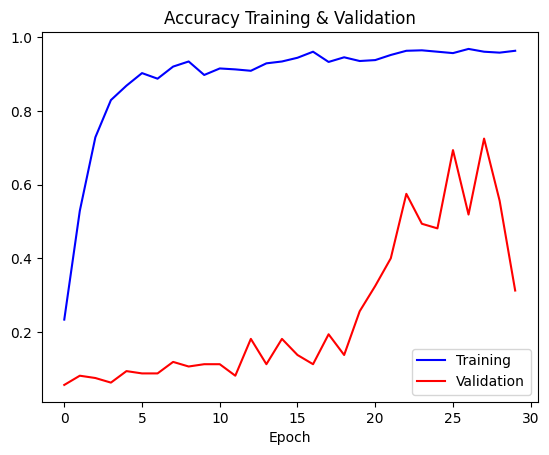

In [28]:
plt.plot(history.history['accuracy'], label='Training', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation', color='red')
plt.title('Accuracy Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

# Menampilkan grafik menampilkan grafik loss pada setiap epoch dari model yang telah dilatih sebelumnya
plt.plot() digunakan untuk memplot nilai loss training dan validation dari setiap epoch. history.history['loss'] adalah nilai loss training yang disimpan pada dictionary history, sedangkan history.history['val_loss'] adalah nilai loss validation. Dalam plot ini, label digunakan untuk memberikan keterangan pada setiap plot, dan color digunakan untuk menentukan warna plot.

Setelah menambahkan keterangan pada plot, kita memanggil plt.title() untuk memberikan judul pada grafik, plt.xlabel() untuk memberikan label pada sumbu x (yaitu jumlah epoch), dan plt.legend() untuk menampilkan legenda pada plot. Akhirnya, kita menampilkan plot menggunakan plt.show().

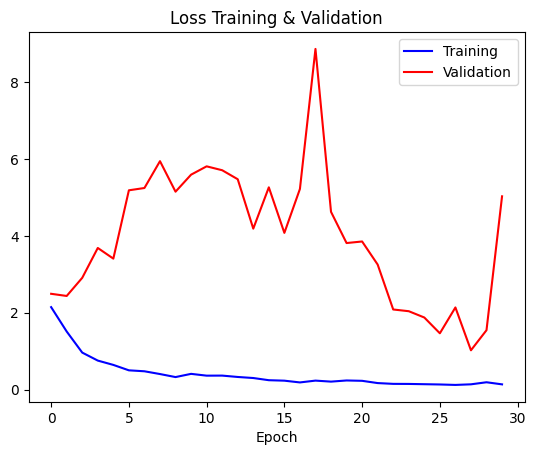

In [29]:
plt.plot(history.history['loss'], label='Training', color='blue')
plt.plot(history.history['val_loss'], label='Validation', color='red')
plt.title('Loss Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

# Mengecek akurasi validasi pada model
Kode yang Anda berikan adalah penggunaan fungsi evaluate_generator() pada objek model untuk mengevaluasi kinerja model pada data validasi yang diberikan oleh validasi_generator.

Baris pertama (test_score = model.evaluate_generator(validasi_generator)) akan mengevaluasi model pada data validasi dan mengembalikan skor yang dihasilkan oleh model. Nilai skor ini disimpan dalam variabel test_score.

Baris kedua (print("[INFO] accuracy validasi: {:.2f}%".format(test_score[1] * 100))) akan mencetak akurasi validasi dari model. Akurasi ini dihitung sebagai persentase dari jumlah prediksi yang benar dibandingkan dengan jumlah total sampel pada data validasi. Format string " {:.2f}%" akan memformat output sebagai bilangan desimal dengan dua digit angka di belakang koma dan simbol persen.

Baris ketiga (print("[INFO] Loss validasi: ",test_score[0])) akan mencetak nilai loss pada data validasi dari model. Loss atau kerugian ini mengukur seberapa baik model memetakan input ke output yang diharapkan. Semakin kecil nilai loss, semakin baik kinerja model.

In [30]:
test_score = model.evaluate_generator( validasi_generator)
print("[INFO] accuracy validasi: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss validasi: ",test_score[0])

<ipython-input-30-9cfe226e1a3d>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator( validasi_generator)


[INFO] accuracy validasi: 36.36%
[INFO] Loss validasi:  4.02162504196167


# Mengecek akurasi training pada model 
Kode yang Anda berikan adalah penggunaan fungsi evaluate_generator() pada objek model untuk mengevaluasi kinerja model pada data latih yang diberikan oleh training_generator.

Baris pertama (test_score = model.evaluate_generator(training_generator)) akan mengevaluasi model pada data latih dan mengembalikan skor yang dihasilkan oleh model. Nilai skor ini disimpan dalam variabel test_score.

Baris kedua (print("[INFO] accuracy training: {:.2f}%".format(test_score[1] * 100))) akan mencetak akurasi pada data latih dari model. Akurasi ini dihitung sebagai persentase dari jumlah prediksi yang benar dibandingkan dengan jumlah total sampel pada data latih. Format string " {:.2f}%" akan memformat output sebagai bilangan desimal dengan dua digit angka di belakang koma dan simbol persen.

Baris ketiga (print("[INFO] Loss training: ",test_score[0])) akan mencetak nilai loss pada data latih dari model. Loss atau kerugian ini mengukur seberapa baik model memetakan input ke output yang diharapkan. Semakin kecil nilai loss, semakin baik kinerja model.

Jadi, keseluruhan kode tersebut akan mengevaluasi kinerja model pada data latih dan mencetak akurasi dan nilai loss dari model pada data latih. Namun, perlu diingat bahwa skor kinerja pada data latih tidak selalu merefleksikan kinerja model pada data yang belum pernah dilihat sebelumnya. Oleh karena itu, evaluasi pada data validasi atau data yang belum pernah dilihat sebelumnya sangat penting untuk mengevaluasi kinerja model secara objektif.

In [31]:
test_score = model.evaluate_generator( training_generator)
print("[INFO] accuracy training: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss training: ",test_score[0])

<ipython-input-31-266dc9ec93c8>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator( training_generator)


[INFO] accuracy training: 50.00%
[INFO] Loss training:  1.952923059463501


# Membuat model dengan arsitektur Xception
Kode yang diberikan merupakan definisi model neural network menggunakan library Keras di TensorFlow. Model ini menggunakan arsitektur Xception sebagai base model untuk ekstraksi fitur dan diikuti beberapa lapisan neural network tambahan.

Baris pertama (model_exception = tf.keras.models.Sequential([...])) mendefinisikan model sebagai sebuah objek Sequential yang berisi beberapa lapisan neural network yang akan dijalankan secara berurutan.

Baris kedua (Xception(weights=None,include_top=False,input_tensor=Input(shape=(300,300,3)))) menggunakan arsitektur Xception sebagai base model. Argumen weights=None mengindikasikan bahwa kita tidak menggunakan bobot yang sudah dilatih sebelumnya, sedangkan argumen include_top=False menandakan bahwa kita tidak akan menggunakan lapisan fully connected layer di akhir dari arsitektur Xception. Argumen terakhir input_tensor=Input(shape=(300,300,3)) menentukan input yang diberikan ke arsitektur Xception, yaitu gambar berukuran 300x300 piksel dengan 3 channel warna.

Baris berikutnya (tf.keras.layers.Dropout(0.5)) menambahkan lapisan Dropout yang akan mengurangi overfitting pada model dengan mengabaikan sejumlah node secara acak selama pelatihan. Dropout ini menghapus 50% node selama pelatihan.

Lapisan berikutnya (tf.keras.layers.Flatten()) men-flatten output dari arsitektur Xception sehingga dapat dihubungkan ke lapisan-lapisan neural network berikutnya.

Lapisan-lapisan neural network berikutnya terdiri dari lapisan Dense dengan jumlah neuron yang berbeda-beda. Setiap lapisan Dense memiliki fungsi aktivasi relu, kecuali lapisan output yang menggunakan softmax untuk menghasilkan probabilitas untuk setiap kelas yang akan diprediksi.

Lapisan BatchNormalization (tf.keras.layers.BatchNormalization()) digunakan untuk mengnormalisasi output dari lapisan sebelumnya sehingga mengurangi ketergantungan antar-fitur dan mempercepat konvergensi.

Jadi, keseluruhan model ini terdiri dari beberapa lapisan neural network yang terhubung berurutan yang menggunakan arsitektur Xception sebagai base model untuk ekstraksi fitur. Model ini menghasilkan probabilitas untuk 11 kelas yang akan diprediksi.

In [32]:
from keras.applications.xception import Xception
model_excpetion = tf.keras.models.Sequential([
    Xception(weights=None,include_top=False,input_tensor=Input(shape=(300,300,3))),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(11, activation='softmax')
])


# Menampilkan arsitektur model CNN Xception
Anda dapat menggunakan metode .summary() pada objek model untuk melihat ringkasan arsitektur model, seperti jumlah total parameter dan dimensi output dari setiap lapisan. Berikut adalah contoh penggunaan metode .summary() pada model yang didefinisikan di atas:

Seperti yang dapat dilihat dari output di atas, model ini terdiri dari 7 lapisan neural network (termasuk base model Xception) dan menghasilkan output dengan dimensi (None, 11) (None disini mengacu pada ukuran batch yang tidak ditentukan secara spesifik). Total parameter pada model ini adalah 125,017,635. Terdapat beberapa lapisan yang memiliki parameter yang sangat besar, seperti lapisan Dense pertama dengan 104,858,112 parameter, dan base model Xception dengan 20,861,480 parameter.

In [33]:
model_excpetion.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 2048)      0         
                                                                 
 flatten_1 (Flatten)         (None, 204800)            0         
                                                                 
 dense_4 (Dense)             (None, 512)               104858112 
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 32)                8224      
                                                                 
 batch_normalization_99 (Bat  (None, 32)              

# Mendifinisikan Callback dan melatih model yang telah didefinisikan dengan arsitektur Xception
Pada kode di atas, kita membuat sebuah objek CNNCallback yang merupakan turunan dari tf.keras.callbacks.Callback. Kita juga menentukan sebuah fungsi on_epoch_end() yang akan dipanggil pada akhir setiap epoch selama pelatihan model. Fungsi ini akan memeriksa apakah akurasi pada data pelatihan dan data validasi telah mencapai lebih dari 85%, dan jika iya, maka pelatihan model akan dihentikan dengan menyetel atribut stop_training pada model menjadi True.

Selanjutnya, kita mengompilasi model dengan menggunakan optimizer Adam dan loss function categorical_crossentropy. Kemudian, kita memanggil fungsi fit() pada objek model untuk melakukan pelatihan model dengan menggunakan data training dan validasi yang sudah dipersiapkan sebelumnya. Pada saat memanggil fungsi fit(), kita juga menentukan beberapa argumen seperti steps_per_epoch dan validation_steps yang menunjukkan jumlah batch yang akan diproses pada setiap epoch pada data training dan validasi, serta jumlah epoch yang akan dilakukan. Terakhir, kita juga menentukan argumen callbacks untuk menyertakan objek CNNCallback yang sudah kita definisikan sebelumnya.

In [34]:
class CNNCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.85 and logs.get('val_accuracy')>0.85):
      print("\nAkurasi di atas 85%, hentikan training nya Sekarang yaaa!")
      self.model.stop_training = True

callbacks = CNNCallback()

# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
model_excpetion.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# melakukan pelatihan model. 
history = model_excpetion.fit(training_generator,
                              steps_per_epoch=25,
                              validation_data=validasi_generator,
                              validation_steps=5,
                              epochs=30,
                              verbose=2,
                              callbacks =[callbacks])

Epoch 1/30
25/25 - 225s - loss: 1.6107 - accuracy: 0.5164 - val_loss: 2.7378 - val_accuracy: 0.0938 - 225s/epoch - 9s/step
Epoch 2/30
25/25 - 188s - loss: 0.8765 - accuracy: 0.8321 - val_loss: 2.9909 - val_accuracy: 0.1125 - 188s/epoch - 8s/step
Epoch 3/30
25/25 - 190s - loss: 0.6633 - accuracy: 0.8788 - val_loss: 3.2320 - val_accuracy: 0.1312 - 190s/epoch - 8s/step
Epoch 4/30
25/25 - 179s - loss: 0.5347 - accuracy: 0.9078 - val_loss: 3.4629 - val_accuracy: 0.0938 - 179s/epoch - 7s/step
Epoch 5/30
25/25 - 186s - loss: 0.4342 - accuracy: 0.9255 - val_loss: 3.4939 - val_accuracy: 0.0875 - 186s/epoch - 7s/step
Epoch 6/30
25/25 - 174s - loss: 0.3580 - accuracy: 0.9495 - val_loss: 3.4062 - val_accuracy: 0.0875 - 174s/epoch - 7s/step
Epoch 7/30
25/25 - 180s - loss: 0.3539 - accuracy: 0.9293 - val_loss: 3.3396 - val_accuracy: 0.0688 - 180s/epoch - 7s/step
Epoch 8/30
25/25 - 189s - loss: 0.3372 - accuracy: 0.9293 - val_loss: 3.1110 - val_accuracy: 0.1000 - 189s/epoch - 8s/step
Epoch 9/30
25/25

# Menampilkan grafik akurasi training dan validasi training
Kode di atas digunakan untuk membuat plot dari kurva akurasi pada data training dan data validasi selama proses pelatihan model.

Kita menggunakan data yang disimpan pada atribut history dari objek model_excpetion untuk mengakses nilai akurasi pada setiap epoch pada data training dan data validasi. Selanjutnya, kita menggunakan fungsi plot() pada objek plt dari library matplotlib untuk membuat plot dengan menggunakan data tersebut.

Berikut adalah penjelasan dari setiap argumen yang digunakan pada fungsi plot():

history.history['accuracy']: data akurasi pada setiap epoch pada data training.
history.history['val_accuracy']: data akurasi pada setiap epoch pada data validasi.
label='Training': label untuk kurva akurasi pada data training.
label='Validation': label untuk kurva akurasi pada data validasi.
color='blue': warna untuk kurva akurasi pada data training.
color='red': warna untuk kurva akurasi pada data validasi.
title('Accuracy Training & Validation'): judul dari plot yang akan dibuat.
xlabel('Epoch'): label pada sumbu x yang menunjukkan jumlah epoch.
legend(loc="lower right"): menampilkan legenda pada plot dengan menempatkannya di pojok kanan bawah.
show(): menampilkan plot.

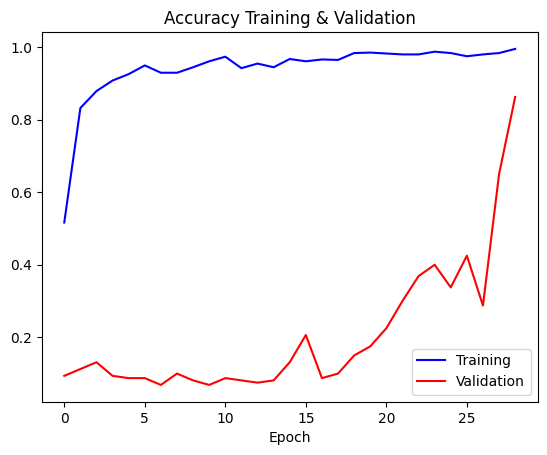

In [35]:
plt.plot(history.history['accuracy'], label='Training', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation', color='red')
plt.title('Accuracy Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

# Menampilkan grafik loss training dan loss validasi
Kode di atas digunakan untuk membuat plot dari kurva loss pada data training dan data validasi selama proses pelatihan model.

Kita menggunakan data yang disimpan pada atribut history dari objek model_excpetion untuk mengakses nilai loss pada setiap epoch pada data training dan data validasi. Selanjutnya, kita menggunakan fungsi plot() pada objek plt dari library matplotlib untuk membuat plot dengan menggunakan data tersebut.

Berikut adalah penjelasan dari setiap argumen yang digunakan pada fungsi plot():

history.history['loss']: data loss pada setiap epoch pada data training.
history.history['val_loss']: data loss pada setiap epoch pada data validasi.
label='Training': label untuk kurva loss pada data training.
label='Validation': label untuk kurva loss pada data validasi.
color='blue': warna untuk kurva loss pada data training.
color='red': warna untuk kurva loss pada data validasi.
title('Loss Training & Validation'): judul dari plot yang akan dibuat.
xlabel('Epoch'): label pada sumbu x yang menunjukkan jumlah epoch.
legend(loc="upper right"): menampilkan legenda pada plot dengan menempatkannya di pojok kanan atas.
show(): menampilkan plot.

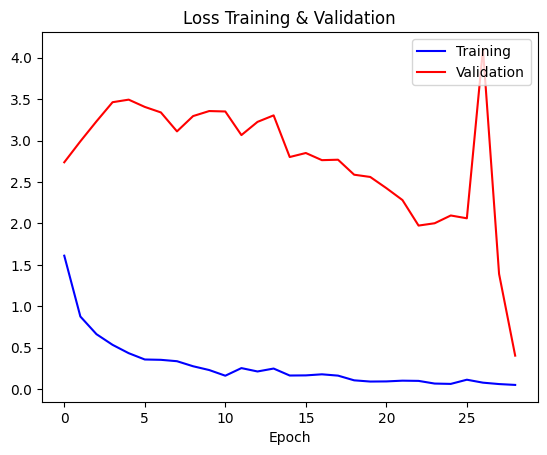

In [36]:
plt.plot(history.history['loss'], label='Training', color='blue')
plt.plot(history.history['val_loss'], label='Validation', color='red')
plt.title('Loss Training & Validation')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

# Menampilkan akurasi pada validasi model
Kode di atas digunakan untuk menghitung dan menampilkan nilai akurasi dan loss pada data validasi.

Kita menggunakan objek model_excpetion untuk melakukan prediksi pada data validasi yang telah disiapkan sebagai input. Selanjutnya, kita menggunakan fungsi evaluate_generator() pada objek model_excpetion untuk menghitung nilai akurasi dan loss pada data validasi.

Berikut adalah penjelasan dari setiap argumen yang digunakan pada fungsi evaluate_generator():

validasi_generator: data validasi yang akan digunakan sebagai input untuk prediksi.
Selanjutnya, kita menggunakan fungsi format() pada string untuk menampilkan nilai akurasi dengan 2 desimal dan menampilkan nilai loss pada data validasi yang telah dihitung.

Berikut adalah penjelasan dari setiap argumen yang digunakan pada fungsi format():

test_score[1] * 100: nilai akurasi pada data validasi dikalikan dengan 100 untuk menghasilkan persentase akurasi.
test_score[0]: nilai loss pada data validasi yang telah dihitung.

In [37]:
test_score = model_excpetion.evaluate_generator( validasi_generator)
print("[INFO] accuracy validasi: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss validasi: ",test_score[0])

<ipython-input-37-c9b5cff50de9>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model_excpetion.evaluate_generator( validasi_generator)


[INFO] accuracy validasi: 84.09%
[INFO] Loss validasi:  0.5802780389785767


# Menampilkan akurasi pada training model dan loss training pada model
Kode di atas digunakan untuk menghitung dan menampilkan nilai akurasi dan loss pada data latih.

Kita menggunakan objek model_excpetion untuk melakukan prediksi pada data latih yang telah disiapkan sebagai input. Selanjutnya, kita menggunakan fungsi evaluate_generator() pada objek model_excpetion untuk menghitung nilai akurasi dan loss pada data latih.

Berikut adalah penjelasan dari setiap argumen yang digunakan pada fungsi evaluate_generator():

training_generator: data latih yang akan digunakan sebagai input untuk prediksi.
Selanjutnya, kita menggunakan fungsi format() pada string untuk menampilkan nilai akurasi dengan 2 desimal dan menampilkan nilai loss pada data latih yang telah dihitung.

Berikut adalah penjelasan dari setiap argumen yang digunakan pada fungsi format():

test_score[1] * 100: nilai akurasi pada data latih dikalikan dengan 100 untuk menghasilkan persentase akurasi.
test_score[0]: nilai loss pada data latih yang telah dihitung.

In [38]:
test_score = model_excpetion.evaluate_generator( training_generator)
print("[INFO] accuracy training: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss training: ",test_score[0])

<ipython-input-38-310715cced50>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model_excpetion.evaluate_generator( training_generator)


[INFO] accuracy training: 84.47%
[INFO] Loss training:  0.840979278087616


In [44]:
# Defining list with labels
labels = ['Almond','Brazil Nut','Cashew','Chestnut','Hazelnut','Macadamia','Peanut','Pecan','Pine Nut','Pistachio','Walnut']


# Check point
# Showing labels
print(labels)

['Almond', 'Brazil Nut', 'Cashew', 'Chestnut', 'Hazelnut', 'Macadamia', 'Peanut', 'Pecan', 'Pine Nut', 'Pistachio', 'Walnut']


# Confusion Matrix Model Dengan Arsitektur Xception



In [42]:
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import numpy as np

target_names = []
for key in validasi_generator.class_indices:
    target_names.append(key)

Y_predic = model_excpetion.predict(training_generator)
y_predic = np.argmax(Y_predic, axis=1)
print('Confusion Matrix 1 ')
c_m = confusion_matrix(training_generator.classes, y_predic)
print(c_m)

25/25 [==============================] - 138s 6s/step
Confusion Matrix 1 
[[20  4  5  5  7  8  6  5  4  5  3]
 [14  8  5  3  6  4  8  8  9  6  1]
 [ 8  6  7  3  3 11  7  9  7  6  5]
 [ 9  8  7  3  8  6  9  5  6  7  4]
 [13  5  5  3  7  8  6  9  5  8  3]
 [11 12  4  2 10 11  3  2  7  7  3]
 [12  5  8  5  5 12  4  6  6  4  5]
 [12  7  9  5  6  9  1  5 10  3  5]
 [14  7  3  2 13  7  5  7  0  9  5]
 [ 7  3  9  4 10  7  3  7 12  6  4]
 [14  6  4  1  6  9  7  7  7  6  5]]


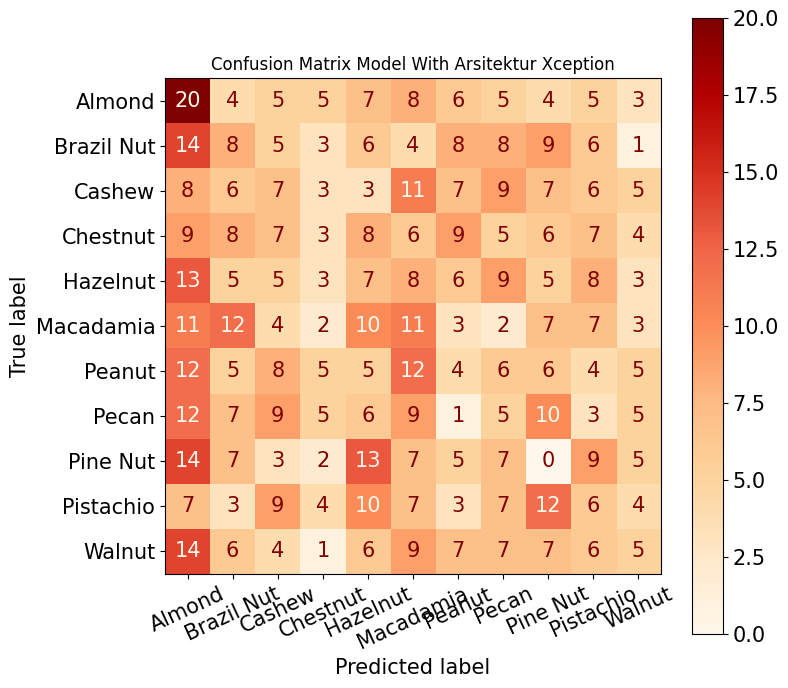

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline
# Setting default of the plot
# Setting default fonsize used in the plot
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['font.size'] = 15
# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)
# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Giving name to the plot
plt.title('Confusion Matrix Model With Arsitektur Xception', fontsize=12)
# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)
# Showing the plot
plt.show()

# Confusion Matrix Model Dengan Arsitektur InceptionV3

In [52]:
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 

target_names = []
for key in validasi_generator.class_indices:
    target_names.append(key)

Y_predic = model.predict(training_generator)
y_predic = np.argmax(Y_predic, axis=1)
print('Confusion Matrix 2 ')
c_m = confusion_matrix(training_generator.classes, y_predic)
print(c_m)

25/25 [==============================] - 143s 6s/step
Confusion Matrix 2 
[[26  2 15  3  2  0 15  4  0  0  5]
 [29  4 18  8  1  0  4  3  0  0  5]
 [27  4 14  4  1  2 16  1  0  0  3]
 [27  5  9  7  4  1  9  1  0  0  9]
 [24  6 13  8  4  0  8  2  0  0  7]
 [26 10 13  4  1  1  7  0  0  0 10]
 [22  3 13  8  1  0 14  9  0  0  2]
 [24  7 12 10  5  0  6  2  0  0  6]
 [26  5 16  7  2  0  9  0  0  0  7]
 [25  6 19  3  2  1  4  6  0  0  6]
 [16 11 13 11  1  0  5  4  1  0 10]]


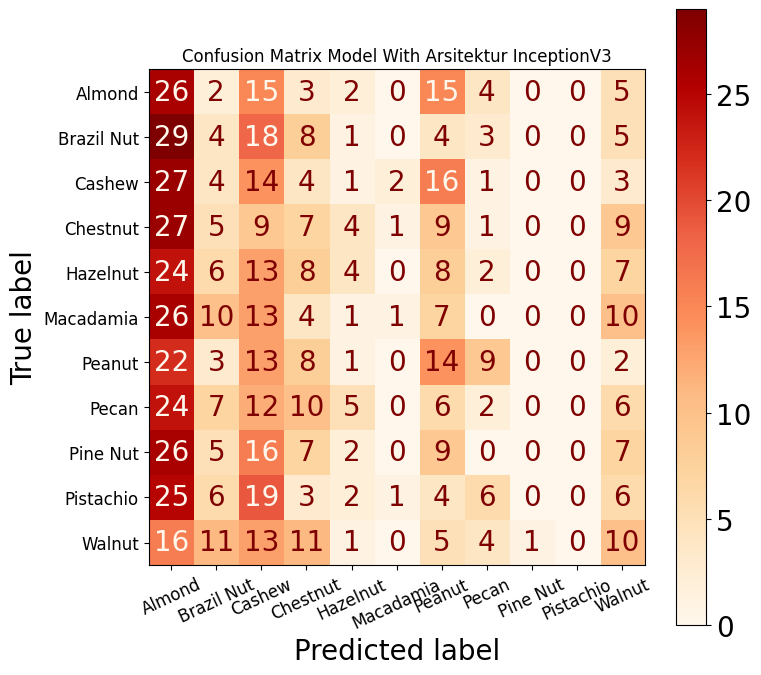

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline
# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.rcParams['font.size'] = 20
# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)
# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Setting fontsize for xticks and yticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Giving name to the plot
plt.title('Confusion Matrix Model With Arsitektur InceptionV3', fontsize=12)
# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)
# Showing the plot
plt.show()